In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
#
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
credit = pd.read_csv("C:\\bbk\predictiveanalytics\course2\DefaultedCreditCardClients.csv")

In [3]:
credit.head()

,GRADUATE,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,AGE,AGE_GROUP,default,LIMIT_BAL_GROUP,LIMIT_BAL
0,0,0,0,689,0,0,0,0,24,1,1,1,20000
1,0,3455,0,1000,1000,1000,0,2000,26,2,1,3,120000
2,0,14948,1518,1500,1000,1000,1000,5000,34,3,0,2,90000
3,0,28959,2000,2019,1200,1100,1069,1000,37,4,0,1,50000
4,0,19146,2000,36681,10000,9000,689,679,57,7,0,1,50000


In [4]:
#remove unnecessary data that does not make any sense
#drop duplicates - always
credit = credit.drop_duplicates()
#check for the nulls
credit.dropna(axis=0, how="any")
nulls = credit.isnull().sum()
nulls

GRADUATE           0
BILL_AMT5          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
AGE                0
AGE_GROUP          0
default            0
LIMIT_BAL_GROUP    0
LIMIT_BAL          0
dtype: int64

In [5]:
credit.dtypes

GRADUATE           int64
BILL_AMT5          int64
PAY_AMT1           int64
PAY_AMT2           int64
PAY_AMT3           int64
PAY_AMT4           int64
PAY_AMT5           int64
PAY_AMT6           int64
AGE                int64
AGE_GROUP          int64
default            int64
LIMIT_BAL_GROUP    int64
LIMIT_BAL          int64
dtype: object

In [6]:
credit['default'].describe()

count    29673.000000
mean         0.220807
std          0.414797
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default, dtype: float64

In [7]:
credit.dtypes

GRADUATE           int64
BILL_AMT5          int64
PAY_AMT1           int64
PAY_AMT2           int64
PAY_AMT3           int64
PAY_AMT4           int64
PAY_AMT5           int64
PAY_AMT6           int64
AGE                int64
AGE_GROUP          int64
default            int64
LIMIT_BAL_GROUP    int64
LIMIT_BAL          int64
dtype: object

In [8]:
credit.describe()

,GRADUATE,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,AGE,AGE_GROUP,default,LIMIT_BAL_GROUP,LIMIT_BAL
count,29673.000000,29673.000000,29673.000000,2.967300e+04,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000
mean,0.351296,40753.744414,5725.735180,5.986292e+03,5283.145284,4879.136960,4852.153608,5272.854177,35.501870,3.462811,0.220807,3.257305,167330.896101
std,0.477383,60984.200602,16643.644619,2.315908e+04,17695.153072,15744.043323,15353.942551,17866.709541,9.232184,1.791121,0.414797,1.827954,129876.644855
min,0.000000,-81334.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,21.000000,1.000000,0.000000,1.000000,10000.000000
25%,0.000000,1981.000000,1000.000000,1.000000e+03,444.000000,324.000000,315.000000,200.000000,28.000000,2.000000,0.000000,1.000000,50000.000000
50%,0.000000,18413.000000,2157.000000,2.037000e+03,1880.000000,1502.000000,1544.000000,1500.000000,34.000000,3.000000,0.000000,3.000000,140000.000000
75%,1.000000,50673.000000,5025.000000,5.000000e+03,4600.000000,4100.000000,4100.000000,4032.000000,41.000000,5.000000,0.000000,5.000000,240000.000000
max,1.000000,927171.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,79.000000,8.000000,1.000000,7.000000,1000000.000000


In [9]:
credit.describe()
#Let's review some of the data analysis output from the DataFrame describe method
# 1. Sanity Check: All counts are same at 29965

,GRADUATE,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,AGE,AGE_GROUP,default,LIMIT_BAL_GROUP,LIMIT_BAL
count,29673.000000,29673.000000,29673.000000,2.967300e+04,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000
mean,0.351296,40753.744414,5725.735180,5.986292e+03,5283.145284,4879.136960,4852.153608,5272.854177,35.501870,3.462811,0.220807,3.257305,167330.896101
std,0.477383,60984.200602,16643.644619,2.315908e+04,17695.153072,15744.043323,15353.942551,17866.709541,9.232184,1.791121,0.414797,1.827954,129876.644855
min,0.000000,-81334.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,21.000000,1.000000,0.000000,1.000000,10000.000000
25%,0.000000,1981.000000,1000.000000,1.000000e+03,444.000000,324.000000,315.000000,200.000000,28.000000,2.000000,0.000000,1.000000,50000.000000
50%,0.000000,18413.000000,2157.000000,2.037000e+03,1880.000000,1502.000000,1544.000000,1500.000000,34.000000,3.000000,0.000000,3.000000,140000.000000
75%,1.000000,50673.000000,5025.000000,5.000000e+03,4600.000000,4100.000000,4100.000000,4032.000000,41.000000,5.000000,0.000000,5.000000,240000.000000
max,1.000000,927171.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,79.000000,8.000000,1.000000,7.000000,1000000.000000


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
header = credit.dtypes.index
print(header)

Index(['GRADUATE', 'BILL_AMT5', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
       'PAY_AMT5', 'PAY_AMT6', 'AGE', 'AGE_GROUP', 'default',
       'LIMIT_BAL_GROUP', 'LIMIT_BAL'],
      dtype='object')


In [12]:
#import pandas_profiling
#from pandas_profiling import ProfileReport
#profile = ProfileReport(credit, title='Pandas Profile report', html={'style':{'full_width':True}})

In [13]:
#profile.to_file(output_file="eda_mod.html")
#Review of the Panda profiling Report gives signficant insight into understanding the variables their distribution, min/max,SD, etc

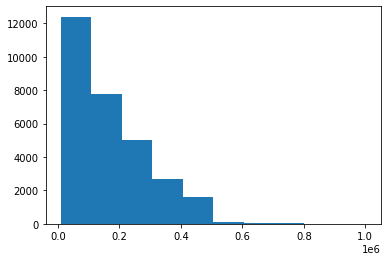

In [14]:
plt.hist(credit['LIMIT_BAL'])
plt.show()

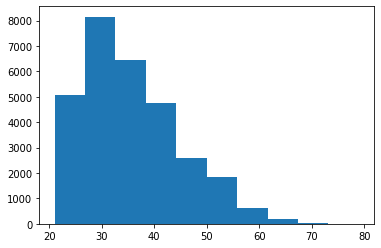

In [15]:
plt.hist(credit['AGE'])
plt.show()

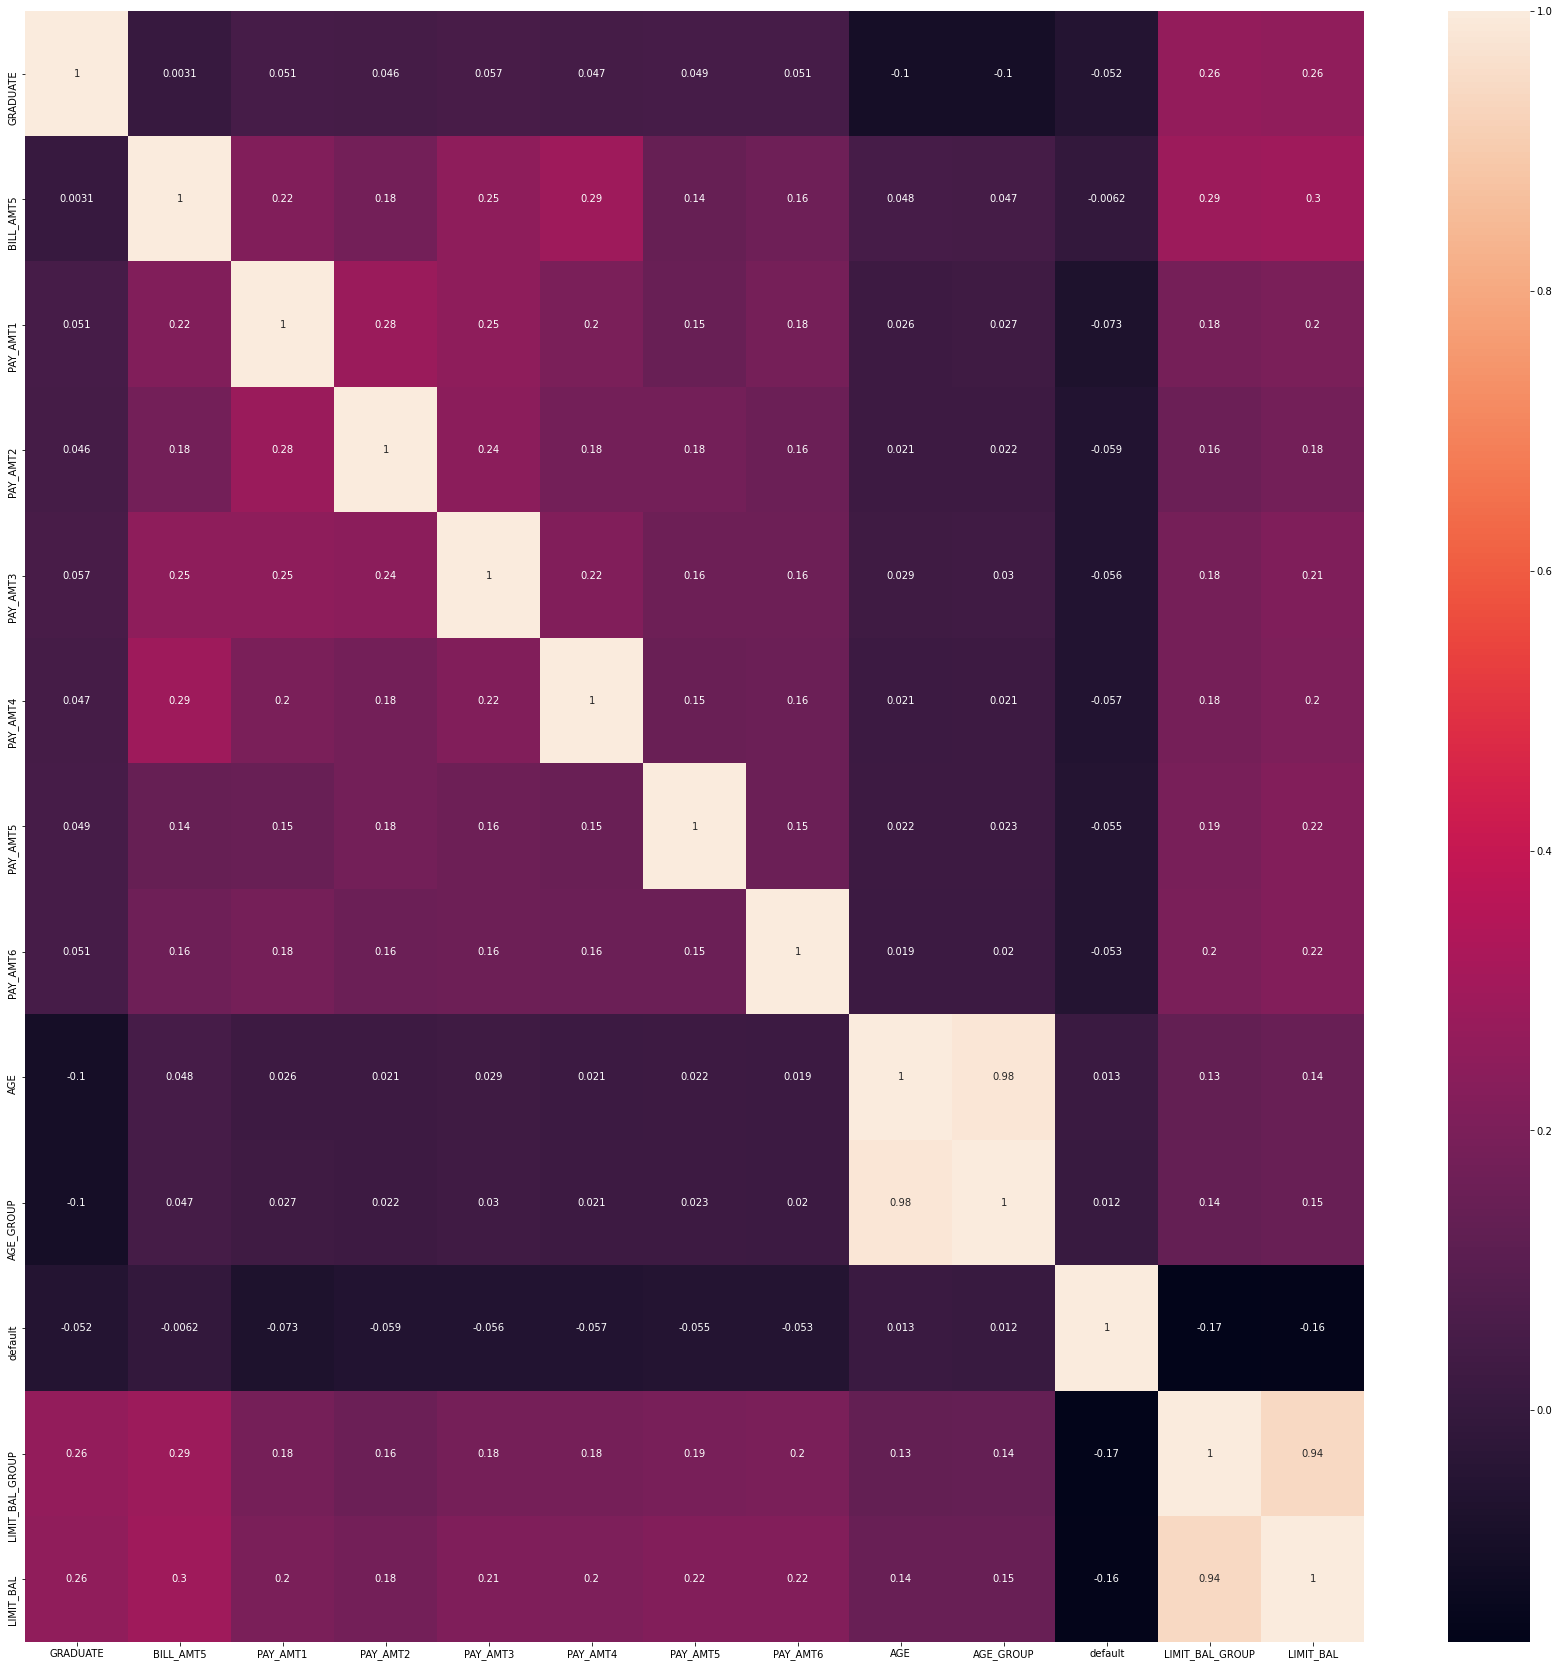

In [16]:
# Now Let's run the correlation matrix and see the relationship to the Limit_Balance before we do any discretization
import numpy
credit_corr = credit.corr()
plt.figure(figsize=(30,30))
sn.heatmap(credit_corr, annot=True)
plt.show()

In [17]:
credit.describe()

,GRADUATE,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,AGE,AGE_GROUP,default,LIMIT_BAL_GROUP,LIMIT_BAL
count,29673.000000,29673.000000,29673.000000,2.967300e+04,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000,29673.000000
mean,0.351296,40753.744414,5725.735180,5.986292e+03,5283.145284,4879.136960,4852.153608,5272.854177,35.501870,3.462811,0.220807,3.257305,167330.896101
std,0.477383,60984.200602,16643.644619,2.315908e+04,17695.153072,15744.043323,15353.942551,17866.709541,9.232184,1.791121,0.414797,1.827954,129876.644855
min,0.000000,-81334.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,21.000000,1.000000,0.000000,1.000000,10000.000000
25%,0.000000,1981.000000,1000.000000,1.000000e+03,444.000000,324.000000,315.000000,200.000000,28.000000,2.000000,0.000000,1.000000,50000.000000
50%,0.000000,18413.000000,2157.000000,2.037000e+03,1880.000000,1502.000000,1544.000000,1500.000000,34.000000,3.000000,0.000000,3.000000,140000.000000
75%,1.000000,50673.000000,5025.000000,5.000000e+03,4600.000000,4100.000000,4100.000000,4032.000000,41.000000,5.000000,0.000000,5.000000,240000.000000
max,1.000000,927171.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,79.000000,8.000000,1.000000,7.000000,1000000.000000


In [18]:
#**************************************************************
#       Course2 Task 3 - Now Let us build the Model
#**************************************************************

In [19]:
################################################################################
# Course2 Task3 - Juptyer Notebook worksheet #
# This Block makes all the Tools required to be Available for use
# Import Basic Tools for DS dat analysis
# Note: you may have to install pandas_profiling package before this could be run, if not installed already
# conda activate datasciencebbk
# conda install -c conda-forge pandas-profiling
################################################################################
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#Import Model Estimators
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.svm import SVR


# Import SKLearn model metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

# Helper classes
%matplotlib inline

In [20]:
credit.head()
#Create Filter to show only Customers who have NOT DEFAULTED
filter = (credit['default'] < 1)
creditgood = credit[filter]

In [21]:
# Indepedent variables assignment to X
X = creditgood.iloc[:, 0:9]
print('----------------------------------------------------')
print('Summary of Independent variable Samples')
X.head()


----------------------------------------------------
Summary of Independent variable Samples


,GRADUATE,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,AGE
2,0,14948,1518,1500,1000,1000,1000,5000,34
3,0,28959,2000,2019,1200,1100,1069,1000,37
4,0,19146,2000,36681,10000,9000,689,679,57
5,1,19619,2500,1815,657,1000,1000,800,37
6,1,483003,55000,40000,38000,20239,13750,13770,29


In [22]:
print('----------------------------------------------------')
# Lets assign Outcome (dependent variable) for Y-axis - LIMIT_BAL_GROUP
y = creditgood['LIMIT_BAL']
y.head()

----------------------------------------------------


2     90000
3     50000
4     50000
5     50000
6    500000
Name: LIMIT_BAL, dtype: int64

In [23]:
# X and y have beend defined as above and verified.
# Let's now Model Algorithms to fit for prediction
# To use multiple algorithms, assign it to an Array and iterate
algrthmClassArray = []
algrthmClassArray.append(('Random Forest Regressor', RandomForestRegressor()))
algrthmClassArray.append(('Linear Regression', LinearRegression()))
algrthmClassArray.append(('Support Vector Regression', SVR()))

In [24]:
#regression
results = []
names = []
for name, model in algrthmClassArray:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [25]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.39795919563538257
Linear Regression 0.22169608826675705
Support Vector Regression -0.037337406858138245


In [26]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)
X_train.head()
y_train.head()
y_test.head()

20949     10000
27913     10000
19086    180000
21652     50000
8464     470000
Name: LIMIT_BAL, dtype: int64

In [27]:
# Based on the comparison above, Using the LIMIT_BAL_GROUP produces more accuracy when compared with LIMIT_BAL itself
# However, the risk is associated with Discretization Range selected for the LIMIT_BAL_GROUP.
# A Multi-variate Regression model will be able to predict a Continuous variable and hence discretization of the 
# Dependent variable is not necessary
algrthm = RandomForestRegressor()
model = algrthm.fit(X_train, y_train)

In [28]:
#Make Predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
y_range = (y_test.max() - y_test.min());
#print('Y Range is %.3f ' % y_range)
model_error_margin = (rmse / y_range) * 100
print('Error Margin is: %.3f' % model_error_margin)
print('RMSE: %.3f' % rmse)

R Squared: 0.404
Error Margin is: 12.838
RMSE: 101423.514


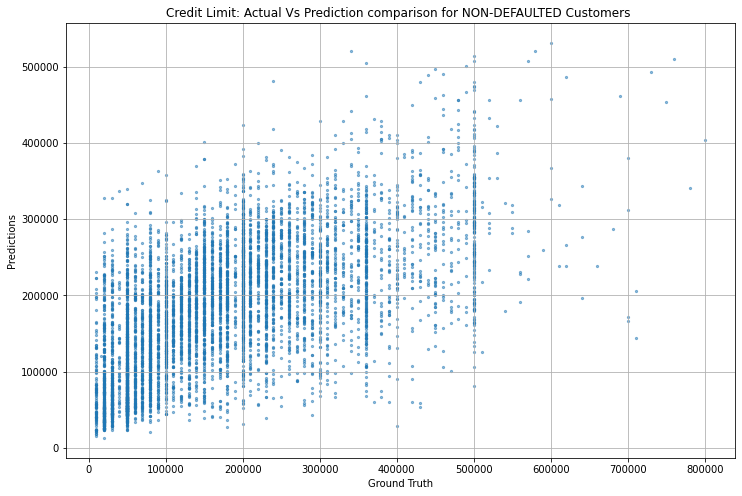

In [29]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, predictions, s=5, alpha = 0.5)
plt.title("Credit Limit: Actual Vs Prediction comparison for NON-DEFAULTED Customers ")
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.grid()
plt.show();

In [30]:
credit.head()
#Create Filter to show only Customers who have DEFAULTED
filterdefaulted = (credit['default'] > 0)
creditbad = credit[filterdefaulted]

In [31]:
# Indepedent variables assignement to X
X = creditbad.iloc[:, 0:9]
print('----------------------------------------------------')
print('Summary of Independent variable Samples')
X.head()

----------------------------------------------------
Summary of Independent variable Samples


,GRADUATE,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,AGE
0,0,0,0,689,0,0,0,0,24
1,0,3455,0,1000,1000,1000,0,2000,26
13,0,36137,3200,0,3000,3000,1500,0,30
16,1,17905,3200,0,1500,0,1650,0,24
21,0,632,316,316,0,632,316,0,39


In [32]:
print('----------------------------------------------------')
# Lets assign Outcome (dependent variable) for Y-axis - Change it to LIMIT BAL 
# Let's verify to see if this changes the outcome of the Model
y = creditbad['LIMIT_BAL']
y.head()

----------------------------------------------------


0      20000
1     120000
13     70000
16     20000
21    120000
Name: LIMIT_BAL, dtype: int64

In [33]:
results = []
names = []
for name, model in algrthmClassArray:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [34]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.4480221558639954
Linear Regression 0.26134185859796205
Support Vector Regression -0.15028721020084798


In [35]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)
X_train.head()
y_train.head()
y_test.head()
y_test.min()
y_range = y_test.max()-y_test.min()
y_range

670000

In [36]:
# Based on the comparison above, Using the LIMIT_BAL_GROUP produces more accuracy when compared with LIMIT_BAL itself
# However, the risk is associated with Discretization Range selected for the LIMIT_BAL_GROUP.
# We will use the LIMIT_BAL for to proceed further with Training the model and assess and revisit the LIMIT_BAL_GROUP later
algrthm = RandomForestRegressor()
model = algrthm.fit(X_train, y_train)

In [37]:
#Make Predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
y_range = (y_test.max() - y_test.min());
#print('Y Range is %.3f ' % y_range)
model_error_margin = (rmse / y_range) * 100
print('Error Margin is: %.3f' % model_error_margin)
print('RMSE: %.3f' % rmse)

R Squared: 0.467
Error Margin is: 12.629
RMSE: 84616.755


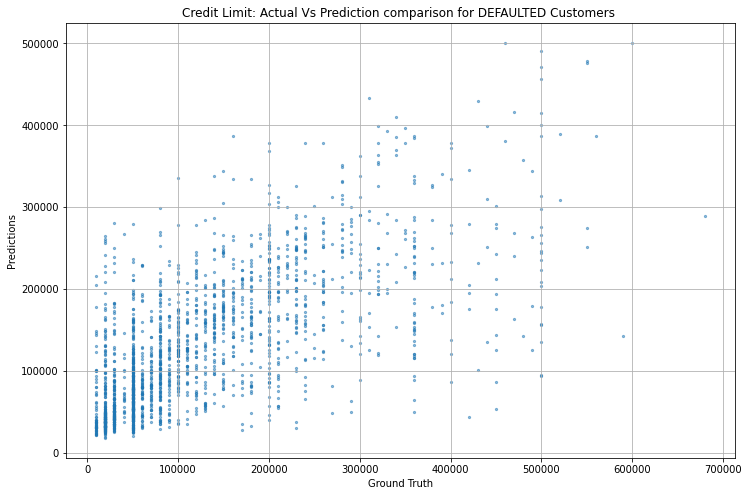

In [38]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, predictions, s=5, alpha = 0.5)
plt.title("Credit Limit: Actual Vs Prediction comparison for DEFAULTED Customers ")
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.grid()
plt.show();